In this notebook, we will do the following tasks:
- Build **Decision Tree**, **Random Forest** and **Gradient Boosting** models using ***scikit-learn*** library.
- Compare the performance of models using **K-fold**.

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Load and Prepare Data


In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Basic ML/datasets/cleaned-data/data_v2/train.csv', index_col='PassengerId')
val_df = pd.read_csv('/content/drive/MyDrive/Basic ML/datasets/cleaned-data/data_v2/val.csv', index_col='PassengerId')

train_df.head()

,Age,Fare,FamilySize,Pclass,Sex,Embarked,Title_Name,Survived
PassengerId,,,,,,,,
693,25.0,56.4958,1,3,male,S,Mr,1
482,30.0,0.0000,1,2,male,S,Mr,0
528,40.0,221.7792,1,1,male,S,Mr,0
856,18.0,9.3500,2,3,female,S,Mrs,1
802,31.0,26.2500,3,2,female,S,Mrs,1


In [13]:
numerical_features = ['Age', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title_Name']

features = numerical_features + categorical_features
label = "Survived"

# Extract features and Label
X_train = train_df[features]
y_train = train_df[label]

X_val = val_df[features]
y_val = val_df[label]

In [14]:
# Create a Preprocessing Pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Decision Tree Model with Hyperparameter Tuning
We use GridSearchCV to find the best hyperparameters for Decision Tree.

In [ ]:
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

dt_params = {
    'classifier__max_depth': np.arange(1, 21).tolist(),
    'classifier__min_samples_split': np.arange(1, 21).tolist(),
    'classifier__class_weight': ['balanced', None]
}

dt_grid = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_params,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

dt_grid.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("Best Hyperparameters:", dt_grid.best_params_)
print("Best Cross-Validation Accuracy:", dt_grid.best_score_)

best_dt = dt_grid.best_estimator_
dt_test_pred = best_dt.predict(X_val)
print("Decision Tree Accuracy on Val Set:", accuracy_score(y_val, dt_test_pred))
print(classification_report(y_val, dt_test_pred))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
Best Hyperparameters: {'classifier__class_weight': None, 'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Best Cross-Validation Accuracy: 0.8104993597951344
Decision Tree Accuracy on Val Set: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# Random Forest Model with Hyperparameter Tuning

In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

rf_params = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [2, 3, 5, 8],
    'classifier__min_samples_split': [1, 2, 5, 10],
    'classifier__class_weight': ['balanced', None]
}

rf_grid = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_params,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("Best Hyperparameters:", rf_grid.best_params_)
print("Best Cross-Validation Accuracy:", rf_grid.best_score_)

best_rf = rf_grid.best_estimator_
rf_test_pred = best_rf.predict(X_val)
print("Random Forest Accuracy on Val Set:", accuracy_score(y_val, rf_test_pred))
print(classification_report(y_val, rf_test_pred))

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'classifier__class_weight': None, 'classifier__max_depth': 8, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best Cross-Validation Accuracy: 0.8301388752092977
Random Forest Accuracy on Val Set: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.71      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# Gradient Boosting Model with Hyperparameter Tuning

In [ ]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

gb_params = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [2, 3, 5, 8],
    'classifier__learning_rate': [0.001, 0.01, 0.1],
    'classifier__criterion': ['squared_error', 'friedman_mse']
}

gb_grid = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=gb_params,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

gb_grid.fit(X_train, y_train)

# Best hyperparameters and corresponding score
print("Best Hyperparameters:", gb_grid.best_params_)
print("Best Cross-Validation Accuracy:", gb_grid.best_score_)

best_gb = gb_grid.best_estimator_
gb_test_pred = best_gb.predict(X_val)
print("Gradient Boosting Accuracy on Val Set:", accuracy_score(y_val, gb_test_pred))
print(classification_report(y_val, gb_test_pred))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'classifier__criterion': 'squared_error', 'classifier__learning_rate': 0.1, 'classifier__max_depth': 2, 'classifier__n_estimators': 300}
Best Cross-Validation Accuracy: 0.8301487245149218
Gradient Boosting Accuracy on Val Set: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       110
           1       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



# Baseline models comparison

Because the data set is imbalanced, **Stratified K-Fold** will be used to ensure each fold has a similar label ratio to the entire data set and use **F1-score** to compare between models.

The hyperparameters of the models are taken from the results of GridSearchCV in previous model training files.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

models = [
    LogisticRegression(C=4.893900918477489, class_weight=None, max_iter=100, solver='liblinear'),
    DecisionTreeClassifier(class_weight=None, max_depth=3, min_samples_split=2),
    RandomForestClassifier(class_weight=None, max_depth=8, min_samples_split=5, n_estimators=50),
    GradientBoostingClassifier(criterion='squared_error', learning_rate=0.1, max_depth=2, n_estimators=300),
    AdaBoostClassifier(
        estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4),
        algorithm='SAMME',
        learning_rate=0.1,
        n_estimators=50
    ),
    SVC(C=1.0, kernel='rbf', class_weight=None)
]

def BaselineModels(models, X, y, metrics, cv=5):
  sk_folds = StratifiedKFold(n_splits = cv, shuffle = True, random_state = 1704)

  entries_1 = []
  entries_2 = []

  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X, y, scoring=metrics ,cv = sk_folds)

    entries_2.append((model_name, scores.mean(), scores.std()))

    for fold_idx, score in enumerate(scores):
      entries_1.append((model_name, fold_idx, score))

  each_fold_df = pd.DataFrame(entries_1, columns = ['Model', 'Fold Id', metrics])
  mean_metric = "Mean " + metrics
  std_metric = "Std " + metrics
  synthesis_fold_df = pd.DataFrame(entries_2, columns = ['Model', mean_metric, std_metric])

  return each_fold_df, synthesis_fold_df

In [16]:
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

X_cv = preprocessor.fit_transform(X)
y_cv = y.values

each_fold_df, synthesis_fold_df = BaselineModels(models, X_cv, y_cv, metrics='f1', cv=5)

In [17]:
each_fold_df

,Model,Fold Id,f1
0,LogisticRegression,0,0.772727
1,LogisticRegression,1,0.793388
2,LogisticRegression,2,0.785185
3,LogisticRegression,3,0.757143
4,LogisticRegression,4,0.716418
5,DecisionTreeClassifier,0,0.787879
6,DecisionTreeClassifier,1,0.741379
7,DecisionTreeClassifier,2,0.789116
8,DecisionTreeClassifier,3,0.720588
9,DecisionTreeClassifier,4,0.697368


In [18]:
synthesis_fold_df

,Model,Mean f1,Std f1
0,LogisticRegression,0.764972,0.027185
1,DecisionTreeClassifier,0.747266,0.036433
2,RandomForestClassifier,0.753694,0.050129
3,GradientBoostingClassifier,0.761357,0.038695
4,AdaBoostClassifier,0.752608,0.041333
5,SVC,0.760631,0.029817


In [37]:
x = np.array(synthesis_fold_df["Std f1"])
print(x.shape)
x = x.reshape(-1)
print(x.shape)

(6,)
(6,)


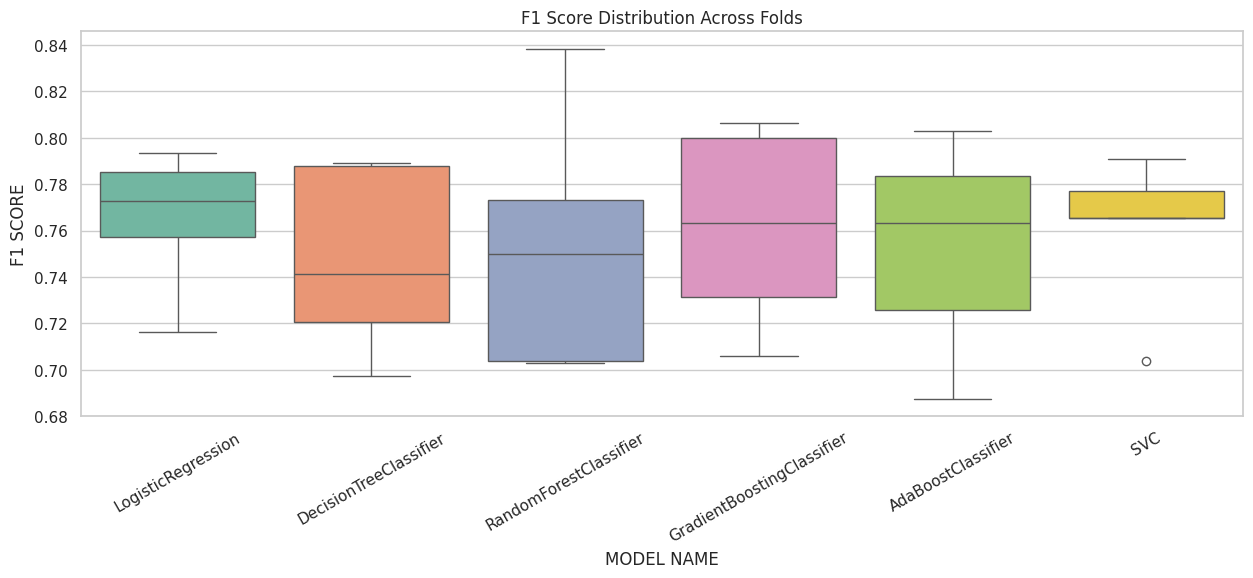

In [42]:
# Visualize the results
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1. Boxplot for F1-score distribution
plt.figure(figsize=(15, 5))
sns.boxplot(x="Model", y="f1", data=each_fold_df, palette="Set2")
plt.xticks(rotation=30)
plt.xlabel("MODEL NAME")
plt.ylabel("F1 SCORE")
plt.title("F1 Score Distribution Across Folds")
plt.show()

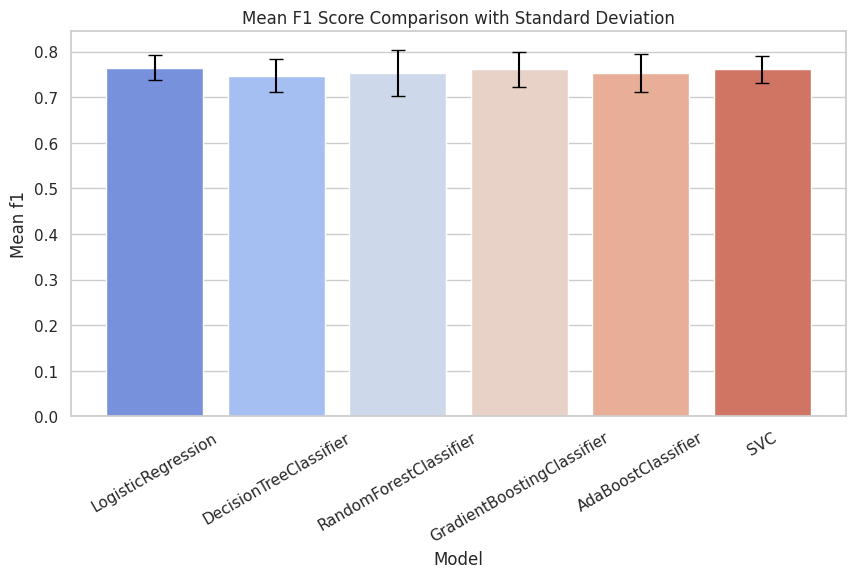

In [45]:
# 2. Barplot for Mean F1-score with Error Bars
plt.figure(figsize=(10, 5))

# Convert standard deviation to NumPy array with correct shape
y_err = synthesis_fold_df["Std f1"].to_numpy()

# Barplot with error bars
sns.barplot(
    x="Model",
    y="Mean f1",
    data=synthesis_fold_df,
    palette="coolwarm",
    capsize=0.2
)

# Add error bars manually using Matplotlib
plt.errorbar(
    x=range(len(synthesis_fold_df)),
    y=synthesis_fold_df["Mean f1"],
    yerr=y_err,
    fmt='none',
    ecolor='black',
    capsize=5
)

plt.xticks(rotation=30)
plt.title("Mean F1 Score Comparison with Standard Deviation")
plt.show()

**Remarks**

**1. Performance Comparison (Mean F1-Score)**
- **Logistic Regression** has the highest mean F1-score (0.764972), making it the best-performing model on average.
- **Gradient Boosting Classifier** and SVC are very close in performance, with mean F1-scores of 0.761357 and 0.760631, respectively.
- **Random Forest** (0.753694) and **AdaBoost** (0.752608) follow, while **Decision Tree** performs the worst (0.747266).

**2. Stability Analysis (Standard Deviation of F1-Score)**
- **Logistic Regression** (0.027185) and **SVC** (0.029817) have the lowest standard deviations, indicating that they are the most stable models across different folds.
- **Random Forest** (0.050129), **AdaBoost** (0.041333), and **Gradient Boosting** (0.038695) show higher variability, meaning their performance fluctuates more across different folds.
- **Decision Tree** (0.036433) also exhibits a moderate variance but is the weakest performer in terms of mean F1-score.

**3. Observations on Individual Folds**

Some models show significant variation in performance across folds. For example:
- **Random Forest** (***Fold 2:*** 0.833235, ***Fold 3:*** 0.703125, ***Fold 4:*** 0.704000) → Indicates inconsistency.
- **Decision Tree** (***Fold 4:*** 0.697368) → Performs poorly on one fold.
- **Gradient Boosting** (***Fold 1:*** 0.806202, ***Fold 3:*** 0.708828) → Has the highest F1 in one fold but drops significantly in another.